In [3]:
import sqlite3
import pandas as pd

testers=['S006','S008','S009','S010','S012','S013','S014','S015','S016','S017',\
         'S018','S019','S020','S021','S022','S023','S024','S025','S026','S027',\
            'S028','S029']

conn=sqlite3.connect('harth.db')

def dataOfTester(tester):
    return 'SELECT * FROM '+tester

def createDataframe(tester):
    tester_df=pd.read_sql_query(dataOfTester(tester),conn)
    if(tester=='S015' or tester=='S021'):
            tester_df=tester_df.drop(columns=['index'])
    if(tester=='S023'):
            tester_df=tester_df.drop(columns=['field1'])
    return tester_df

tester_df = [createDataframe(tester) for tester in testers]

tester_df[0]['timestamp']=pd.to_datetime(tester_df[0]['timestamp'])
timedelta_list = []

for df in tester_df:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    timedelta = df['timestamp'].iloc[1] - df['timestamp'].iloc[0]
    timedelta_list.append(timedelta)

print(timedelta_list)
for i in range(len(testers)):
    tester_df[i]['timestamp']=pd.to_datetime(tester_df[i]['timestamp'])
    interval=timedelta_list[i]
    tester_df[i]['sample']=(tester_df[i]['timestamp']-tester_df[i]['timestamp'].iloc[0])//interval
    tester_df[i].drop(columns=['timestamp'],inplace=True)



      
# tester_df[0]['sample']=(tester_df[0]['timestamp']-tester_df[0]['timestamp'].iloc[0])//interval
# tester_df[0].drop(columns=['timestamp'],inplace=True)



tester_df[4].head()



[Timedelta('0 days 00:00:00.010000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.019999995'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000')]


,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,sample
0,-3.810360,0.165219,-0.663742,-0.919657,-0.759899,0.239633,6,0
1,-0.188988,-0.235452,-1.343093,-0.137463,-0.852652,-1.423640,6,1
2,-0.060000,0.008919,-0.876293,1.347957,-0.642281,-2.081678,6,2
3,-1.222393,0.028038,-0.460220,1.063477,-2.840740,-0.143171,6,3
4,-1.026113,-0.170239,-0.163068,-3.239610,0.924564,-0.720399,6,4


In [4]:
#lets create the rolling window
rolling_window=[0]*len(tester_df)
for i in range(len(tester_df)):
    rolling_window[i] = tester_df[i].iloc[:,:-2].rolling(window=10,center=True).mean()
    rolling_window[i]['label']=tester_df[i]['label']
    rolling_window[i].bfill(limit=5, inplace=True)
    rolling_window[i].ffill(limit=5, inplace=True)

for i in rolling_window:
    print(i.tail(10))





          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
408699 -0.718071  0.035292 -0.691135  0.063827  0.068942  1.002220      7
408700 -0.716116  0.034737 -0.691002  0.073453  0.069298  1.001427      7
408701 -0.717247  0.034221 -0.689879  0.061229  0.068797  1.003284      7
408702 -0.715693  0.034660 -0.691207  0.077474  0.069538  1.001981      7
408703 -0.717548  0.034044 -0.689069  0.054243  0.068358  1.003505      7
408704 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408705 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408706 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408707 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408708 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
418979 -0.990182 -0.169308 -0.198136 -0.988800 -0.129428 -0.075978      3
418980 -0.986373 -0.163015 -0.199718 -

In [5]:
unified_df=pd.concat(rolling_window,ignore_index=True)

In [6]:
unified_df.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,-0.87638,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6
1,-0.87638,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6
2,-0.87638,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6
3,-0.87638,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6
4,-0.87638,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6


Lets reduce the size of the dataframe

In [7]:
reduced_df = unified_df.iloc[::10]

In [8]:
reduced_df.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,-0.876380,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6
10,-1.006859,0.074721,0.089308,-0.974518,-0.003052,-0.215387,6
20,-0.991737,0.085056,0.089645,-0.958462,-0.022246,-0.272258,6
30,-0.990274,0.063432,0.081977,-0.963217,0.008743,-0.274750,6
40,-0.991217,0.066012,0.084444,-0.961309,0.028240,-0.302519,6


In [9]:
review=reduced_df['label']
reduced_df.drop(columns=['label'],inplace=True,errors='ignore')

C:\Users\gdste\AppData\Local\Temp\ipykernel_33300\3044613114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df.drop(columns=['label'],inplace=True,errors='ignore')


In [10]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df=reduced_df.copy()
columns_to_normalize = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
scaled_df[columns_to_normalize]=scaler.fit_transform(scaled_df[columns_to_normalize])
scaled_df.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
0,0.028773,0.630492,0.712099,-1.088415,-0.338208,-0.874095
10,-0.408916,0.435352,0.748670,-0.771853,-0.095744,-0.965267
20,-0.358190,0.486492,0.749646,-0.739207,-0.172539,-1.058262
30,-0.353282,0.379491,0.727452,-0.748875,-0.048551,-1.062338
40,-0.356448,0.392260,0.734592,-0.744995,0.029453,-1.107746


In [12]:
reduced_df.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
0,-0.876380,0.114158,0.076672,-1.130216,-0.063653,-0.159632
10,-1.006859,0.074721,0.089308,-0.974518,-0.003052,-0.215387
20,-0.991737,0.085056,0.089645,-0.958462,-0.022246,-0.272258
30,-0.990274,0.063432,0.081977,-0.963217,0.008743,-0.274750
40,-0.991217,0.066012,0.084444,-0.961309,0.028240,-0.302519


c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


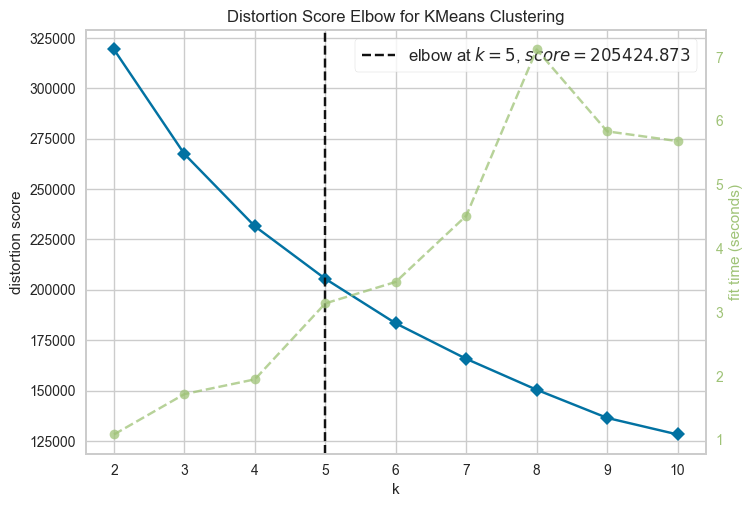

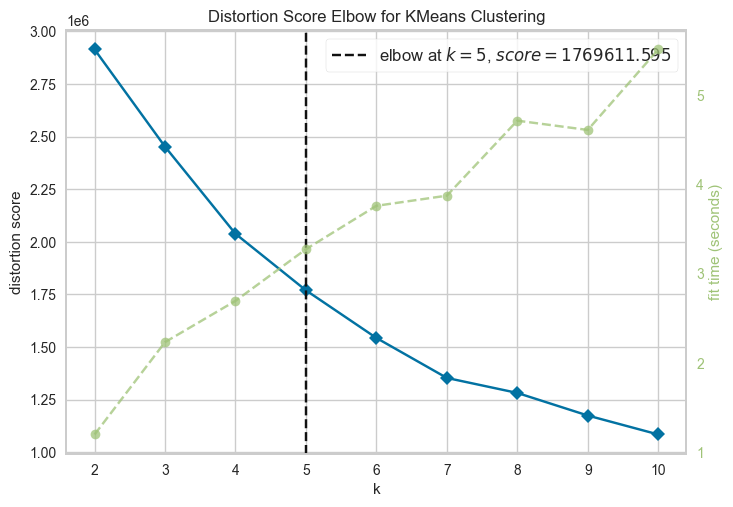

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(n_init=10)
sil_vis = KElbowVisualizer(kmeans,numeric_only=None)
sil_vis.fit(reduced_df)
sil_vis.show()

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_init=10)
sil_vis = KElbowVisualizer(kmeans,numeric_only=None)
sil_vis.fit(scaled_df)
sil_vis.show()

In [17]:
kmeans=KMeans(n_clusters=5,n_init=10)
kmeans.fit(scaled_df)
scaled_df['cluster']=kmeans.labels_
print(scaled_df.head())

      back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  cluster
0   0.028773  0.630492  0.712099 -1.088415 -0.338208 -0.874095        4
10 -0.408916  0.435352  0.748670 -0.771853 -0.095744 -0.965267        4
20 -0.358190  0.486492  0.749646 -0.739207 -0.172539 -1.058262        4
30 -0.353282  0.379491  0.727452 -0.748875 -0.048551 -1.062338        4
40 -0.356448  0.392260  0.734592 -0.744995  0.029453 -1.107746        4


In [21]:
comparsion=pd.merge(scaled_df,pd.DataFrame({'review': review}),left_index=True,right_index=True)
contingency_table = pd.crosstab(comparsion['review'], comparsion['cluster'])

In [22]:
print(contingency_table)

cluster       0      1      2      3       4
review                                      
1          3372    103   1111      4  115113
2          1090   1481   4048      3   22514
3           565     71     76      0   24800
4           456     40      7      0    7110
5           144      2      6      1    6564
6          1462     35    206      0   72651
7        223489   3146  60786     58    2791
8            79  21131  10751  10725     202
13         7742     71   2271      0   29312
14          127    146    389      0    4916
130         334     14     69      0    3762
140          45      0     18      0     724


In [24]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.51464329019432


In [13]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,n_init='auto')
kmeans.fit(scaled_df)
scaled_df['cluster']=kmeans.labels_
print(scaled_df.head())

c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


      back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  cluster
0   0.028773  0.630492  0.712099 -1.088415 -0.338208 -0.874095        2
10 -0.408916  0.435352  0.748670 -0.771853 -0.095744 -0.965267        2
20 -0.358190  0.486492  0.749646 -0.739207 -0.172539 -1.058262        2
30 -0.353282  0.379491  0.727452 -0.748875 -0.048551 -1.062338        2
40 -0.356448  0.392260  0.734592 -0.744995  0.029453 -1.107746        2


In [14]:
comparsion=pd.merge(scaled_df,pd.DataFrame({'review': review}),left_index=True,right_index=True)
contingency_table = pd.crosstab(comparsion['review'], comparsion['cluster'])
print(contingency_table)

cluster      0       1       2      3     4
review                                     
1          629    3664  115386      4    20
2         3771    1290   24071      3     1
3           64     585   24856      0     7
4            7     453    7153      0     0
5            8     126    6582      1     0
6          173    1471   72705      0     5
7        61595  222655    5960     59     1
8        12015    2616    9449  10725  8083
13        1961    7866   29559      0    10
14         282     114    5182      0     0
130         74     308    3797      0     0
140         17      44     726      0     0


Silhouette Score for 2 clusters: 0.34488270593112824
Silhouette Score for 3 clusters: 0.36177019311093495
Silhouette Score for 4 clusters: 0.39091241852126024
Silhouette Score for 5 clusters: 0.3776635677693656
Silhouette Score for 6 clusters: 0.35923841403962586
Silhouette Score for 7 clusters: 0.2686248173064667
Silhouette Score for 8 clusters: 0.26911366491827515
Silhouette Score for 9 clusters: 0.2602124382981836
Silhouette Score for 10 clusters: 0.26051508024860837


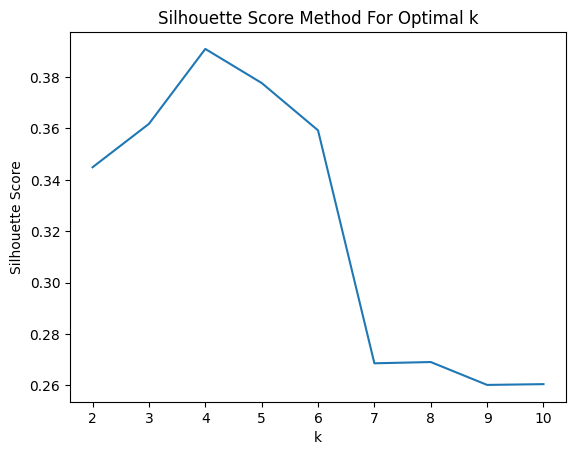

In [25]:
# Silhouette Score Method
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.utils import resample
silhouette_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_df)
#     score = silhouette_score(scaled_df, kmeans.labels_)
#     silhouette_scores.append(score)

# plt.figure(figsize=(10, 5))
# plt.plot(range(2, 11), silhouette_scores, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score Method For Optimal k')
# plt.show()
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_df)
    sample_data,sample_labels=resample(scaled_df,kmeans.labels_,n_samples=100000,random_state=42)
    score=silhouette_score(sample_data,sample_labels)
    print('Silhouette Score for',i,'clusters:',score)
    silhouette_scores.append(score)

plt.title('Silhouette Score Method For Optimal k')
plt.plot(range(2,11),silhouette_scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()





Lets try kmeans with k equeal to the classes